# IA 340: Car Crash Analysis

## By: Veronica A. Lopez-Romero

### Data Source:

The data was downloaded from [Data.gov](https://catalog.data.gov/dataset/crash-reporting-drivers-data)

The data has been collected gradually and the last update occurred in October 4, 2024.

### Questions:

1. Which vehicle make and model is involved in the most crashes?

2. Are distracted drivers involved in more crashes or specific route types?

3. How does the frequency of crashes change with different speed limits?

## Load the data from S3

In [41]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-304850/Crash_Reporting_-_Drivers_Data.csv') # load the data from s3
df.head() #show the top 5 rows

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


## View data

In [42]:
df.shape #show the number of rows and columns 

(185743, 39)

In [43]:
df['Speed Limit'] #select a column 

0          0
1          5
2         15
3         15
4         35
          ..
185738    35
185739    30
185740    35
185741     0
185742    35
Name: Speed Limit, Length: 185743, dtype: int64

In [44]:
df[df['Speed Limit']>5] # select rows by values 

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
5,MCP3348000Z,230051804,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 AM,Maryland (State),NORBECK RD,DRURY RD,NaN,NaN,...,East,30,No,No,2010,MERCEDES,ML360,39.116462,-77.050530,"(39.11646167, -77.05053)"
6,MCP302600BD,230046425,Montgomery County Police,Property Damage Crash,07/27/2023 12:30:00 PM,County,GREENTREE RD,OLD GEORGETOWN RD,NaN,NaN,...,East,30,No,No,2022,HOND,PILOT,39.000144,-77.109881,"(39.00014446, -77.10988077)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185737,MCP3164006V,240046134,MONTGOMERY,Property Damage Crash,09/27/2024 11:05:00 AM,Other Public Roadway,GLENMONT CIR #1,RAMP 4 FR MD 97 NB TO RANDOLPH RD EB,NaN,NaN,...,NaN,35,No,No,2022,TOYOTA,RAV4,39.059023,-77.047647,"(39.05902322, -77.04764702)"
185738,MCP3362004B,240046185,MONTGOMERY,Property Damage Crash,09/26/2024 03:10:00 PM,Maryland (State) Route,UNIVERSITY BLVD E,NaN,NaN,NaN,...,Eastbound,35,No,No,2024,SUBARU,FORESTER,39.019180,-77.012060,"(39.01918006, -77.01205996)"
185739,MCP2513004H,240046173,MONTGOMERY,Injury Crash,09/27/2024 01:39:00 PM,Maryland (State) Route,GEORGIA AVE (SB/L),NaN,NaN,NaN,...,Northbound,30,No,No,2022,KIA,SOUL,39.008914,-77.040292,"(39.00891438, -77.04029211)"
185740,MCP2209002W,240046274,MONTGOMERY,Injury Crash,09/27/2024 10:09:00 PM,County Route,NaN,NaN,NaN,NaN,...,Northbound,35,No,No,2017,GMC,SIERRA,38.994804,-77.191000,"(38.99480394, -77.19099956)"


## Explore and clean data

In [45]:
df.info() #show the data types and number of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185743 entries, 0 to 185742
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  185743 non-null  object 
 1   Local Case Number              185743 non-null  object 
 2   Agency Name                    185743 non-null  object 
 3   ACRS Report Type               185743 non-null  object 
 4   Crash Date/Time                185743 non-null  object 
 5   Route Type                     167555 non-null  object 
 6   Road Name                      166885 non-null  object 
 7   Cross-Street Name              161335 non-null  object 
 8   Off-Road Description           17150 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           5936 non-null    object 
 11  Collision Type                 185158 non-null  object 
 12  Weather                       

In [46]:
df = df[['Report Number','Location','Vehicle Year','Vehicle Make','Vehicle Model','Speed Limit','Driver Distracted By', 'Road Name', 'Route Type']] # keep specific columns 

In [47]:
df.head()

,Report Number,Location,Vehicle Year,Vehicle Make,Vehicle Model,Speed Limit,Driver Distracted By,Road Name,Route Type
0,DM8479000T,"(38.98765667, -76.987545)",2017,HINO,TWK,0,UNKNOWN,NaN,NaN
1,MCP2970000R,"(39.03991652, -77.05364898)",2012,TOYOTA,SU,5,UNKNOWN,NaN,NaN
2,MCP20160036,"(38.743373, -77.54699707)",2015,MAZD,TK,15,NOT DISTRACTED,NaN,NaN
3,EJ7879003C,"(39.14587303, -77.19194047)",2018,RAM,TK,15,UNKNOWN,NaN,NaN
4,MCP2967004Y,"(39.02517017, -77.07633333)",2017,AUDI,A3,35,NOT DISTRACTED,CONNECTICUT AVE,Maryland (State)


In [48]:
df = df.dropna() #drop null values
df.isnull().sum()

Report Number           0
Location                0
Vehicle Year            0
Vehicle Make            0
Vehicle Model           0
Speed Limit             0
Driver Distracted By    0
Road Name               0
Route Type              0
dtype: int64

In [49]:
df.head()

,Report Number,Location,Vehicle Year,Vehicle Make,Vehicle Model,Speed Limit,Driver Distracted By,Road Name,Route Type
4,MCP2967004Y,"(39.02517017, -77.07633333)",2017,AUDI,A3,35,NOT DISTRACTED,CONNECTICUT AVE,Maryland (State)
5,MCP3348000Z,"(39.11646167, -77.05053)",2010,MERCEDES,ML360,30,NOT DISTRACTED,NORBECK RD,Maryland (State)
6,MCP302600BD,"(39.00014446, -77.10988077)",2022,HOND,PILOT,30,NOT DISTRACTED,GREENTREE RD,County
7,MCP2583003S,"(39.14009241, -77.48402152)",2005,FORD,EXPLORER,30,UNKNOWN,ELMER SCHOOL RD,County
8,MCP3372001V,"(39.0724598, -77.06486034)",2016,TOYOTA,CAMRY,35,NOT DISTRACTED,GEORGIA AVE,Maryland (State)


In [50]:
df.describe() #statistical summary of the data

,Vehicle Year,Speed Limit
count,165119.000000,165119.000000
mean,1974.566385,34.852561
std,309.184915,8.265014
min,0.000000,0.000000
25%,2006.000000,30.000000
50%,2012.000000,35.000000
75%,2016.000000,40.000000
max,9999.000000,75.000000


## Visualize data with Generative AI

### I will be using Generative AI to provide visualizations that will answer my questions.

In [51]:
pip install jupyter-ai~=1.0

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install jupyter-ai[all]

Note: you may need to restart the kernel to use updated packages.


In [53]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)


In [54]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [55]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [56]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [57]:
%%ai gpt4

explain the data in dataframe {df} in {In[18]}

The given dataframe contains information about vehicle crashes. It has 9 columns:

1. `Report Number`: This appears to be an identifier for each crash report.
2. `Location`: The geographical coordinates of the crash.
3. `Vehicle Year`: The production year of the involved vehicle.
4. `Vehicle Make`: The manufacturer of the involved vehicle.
5. `Vehicle Model`: The specific model of the involved vehicle.
6. `Speed Limit`: The speed limit of the road where the crash occurred.
7. `Driver Distracted By`: Information on whether the driver was distracted and possibly the source of distraction.
8. `Road Name`: The name of the road where the crash occurred.
9. `Route Type`: The type of the road where the crash occurred, such as Maryland (State), County, Maryland (State) Route, County Route, Other Public Roadway.

This data can be used to analyze and understand various aspects of vehicle crashes, such as which vehicle models are involved in the most crashes, whether driver distraction is a significant factor, how speed limits affect the frequency and severity of crashes, and which types of roads are most prone to crashes.

In [70]:
%%ai gpt4 -f code

which vehicle make and model is involved in the most crashes? use the data in {df} to create a bar chart

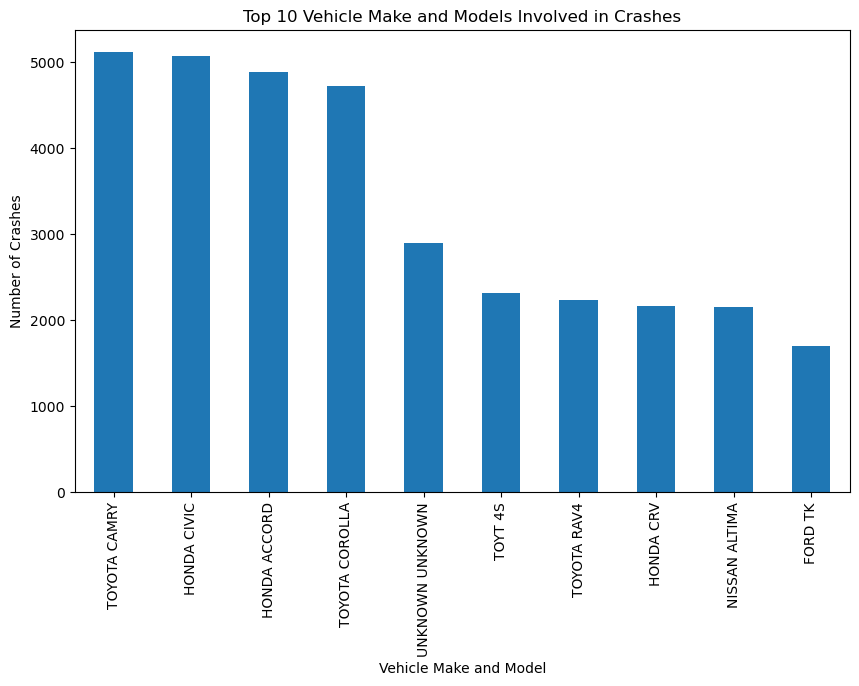

In [71]:
import matplotlib.pyplot as plt

# Combine 'Vehicle Make' and 'Vehicle Model' into a single column
df['Make_Model'] = df['Vehicle Make'] + " " + df['Vehicle Model']

# Calculate the number of crashes for each make and model
crash_counts = df['Make_Model'].value_counts()

# Get the top 10 make and models involved in the most crashes
top_10 = crash_counts[:10]

# Create a bar chart
plt.figure(figsize=(10,6))
top_10.plot(kind='bar')
plt.xlabel('Vehicle Make and Model')
plt.ylabel('Number of Crashes')
plt.title('Top 10 Vehicle Make and Models Involved in Crashes')
plt.show()

After creating a bar chart showing which vehicle make and model were most involved in car crashes, the Toyota Camry emerged as the most frequently involved, with over 5,000 crash reports. It is considered the vehicle most associated with crashes, with several other models also appearing in the top 10. However, it is important to note that these occurrences could be influenced by various factors, such as driver distractions, weather conditions, or road surface conditions, rather than the vehicle itself being inherently more dangerous.

In [80]:
%%ai gpt4 -f code

Are distracted drivers involved in more crashes or specific route types? use the data in {df} to visualize it on a bar chart

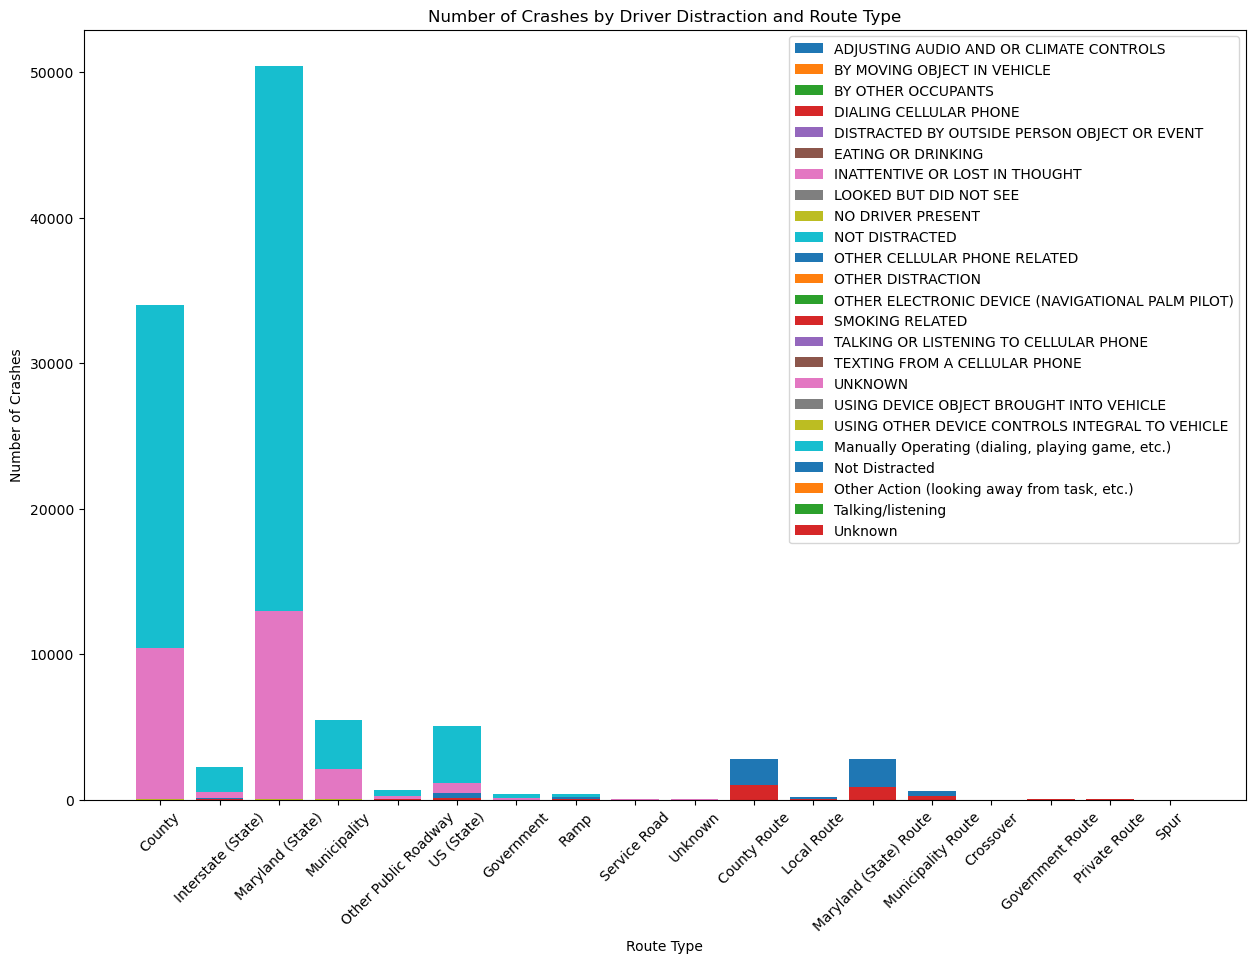

In [81]:
import matplotlib.pyplot as plt

# Grouping data by 'Route Type' and 'Driver Distracted By' fields and count the number of cases
df_grouped = df.groupby(['Route Type', 'Driver Distracted By']).size().reset_index(name='Count')

# Plot a bar chart
plt.figure(figsize=(15, 10))
for distraction in df_grouped['Driver Distracted By'].unique():
    subset = df_grouped[df_grouped['Driver Distracted By'] == distraction]
    plt.bar(subset['Route Type'], subset['Count'], label=distraction)

plt.title('Number of Crashes by Driver Distraction and Route Type')
plt.xlabel('Route Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The bar chart shows that crashes are more often caused by distracted drivers than by specific route types. Interstate crashes occur more frequently due to distractions like manually operating vehicle controls or being inattentive and lost in thought. As observed, the second most frequent route type for crashes is county areas, where a similar pattern of distractions, such as inattentiveness and manual vehicle operation, is also present.

In [84]:
%%ai gpt4 -f code

How does the frequency of crashes change with different speed limits? use the data in {df} to create a line chart

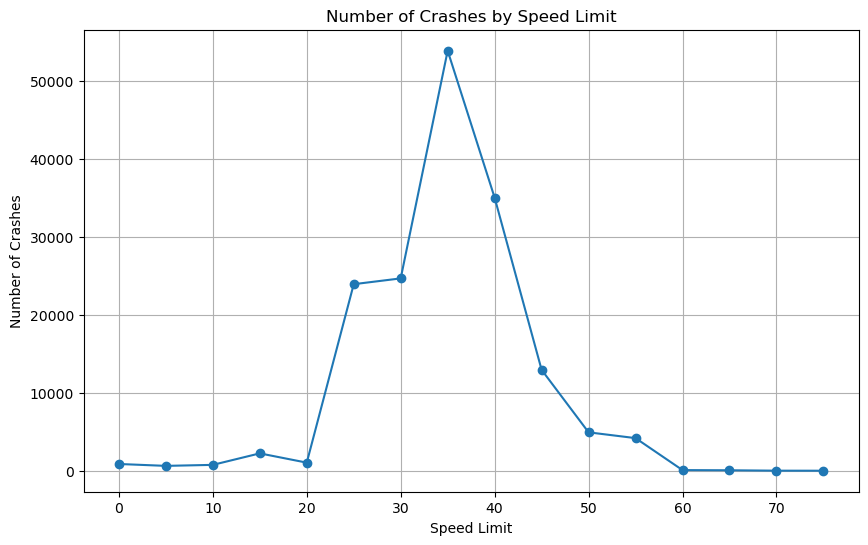

In [85]:
import matplotlib.pyplot as plt

speed_limit_counts = df['Speed Limit'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(speed_limit_counts.index, speed_limit_counts.values, marker='o')
plt.title('Number of Crashes by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

The line chart indicates that the frequency of crashes varies significantly with speed limits. The findings were surprising, as the highest number of crashes occurred at around 35 mph. Car crashes predominantly take place within the speed range of 25 to 45 mph.